In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import category_encoders as ce
import statsmodels.stats.power as smp
from sklearn.preprocessing import MinMaxScaler

df_org = pd.read_csv(r"census_income_original_2.csv")
df = df_org.copy()

C:\Users\t-aelmiggabbar\AppData\Local\Temp\ipykernel_22884\2211330390.py:8: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_org = pd.read_csv(r"census_income_original_2.csv")


In [5]:
# clean
df = df_org.copy()

# combine net gain and loss
df['net_capital'] = df['capital.gain'] + (df['capital.loss']*-1)
#df.drop(columns=['capital.gain', 'capital.loss'], inplace=True)

# encode income
df['income>50k'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# handlin income_value missing values
df['income_value'] = pd.to_numeric(df['income_value'], errors='coerce')
df['income_value_encoded'] = np.where(
    (df['income>50k'] == 1) & (df['income_value'] > 50000), 1,
    np.where(
        (df['income>50k'] == 0) & (df['income_value'] <= 50000), -1,
        0 
    )
)

# handling missing catigorical variables
cont_cols = ['income_value', 'age', 'capital.gain', 'capital.loss', 'hours.per.week', 'net.capital']
cat_cols = ['relationship', 'occupation', 'education', 'marital.status', 'race', 'native.country', 'workclass', 'income_value_encoded']

for col in cat_cols:
    df[col] = df[col].replace('?', np.nan)
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)
#df.drop(columns=[ 'ID', 'education', 'marital.status', 'race', 'native.country', 'workclass', 'income', 'income_value'], inplace=True)
#df.drop(columns=[ 'ID', 'income', 'income_value'], inplace=True)


#encode gender
mapping = {
    'm': 0,'m ': 0,'M': 0,'malee': 0,'male ': 0,'male': 0,'Male': 0,'Female': 1,'female': 1,'f': 1
}
df['Gender'] = df['Gender'].map(mapping)

#df = pd.get_dummies(df, columns=cat_cols)



In [6]:
df.head(5)

,ID,age,workclass,education,education.num,marital.status,occupation,relationship,race,Gender,capital.gain,capital.loss,hours.per.week,native.country,income,income_value,net_capital,income>50k,income_value_encoded
0,1,90,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,40,United-States,<=50K,7986.0,-4356,0,-1
1,2,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K,4566.0,-4356,0,-1
2,3,66,Private,Some-college,10,Widowed,Exec-managerial,Unmarried,Black,1,0,4356,40,United-States,<=50K,2571.0,-4356,0,-1
3,4,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,<=50K,8611.0,-3900,0,-1
4,5,41,Private,Some-college,10,Separated,"Prof-,specialty",Own-child,White,1,0,3900,40,United-States,<=50K,1553.0,-3900,0,-1


In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cat(df, col):
    plt.figure(figsize=(8, 6))
    w = df[col].nunique() * 0.051
    ax = sns.countplot(x=df[col], palette='viridis', width=w)
    
    plt.title(f"Barplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    
    total = len(df)
    
    for p in ax.patches:
        height = p.get_height()
        proportion = height / total 
        if col == 'income_value_encoded':
            ax.text(p.get_x() + p.get_width() / 2, height + 0.05, f'{proportion:.4f}', 
                ha='center', va='bottom', fontsize=10, color='black')
        else:
            ax.text(p.get_x() + p.get_width() / 2, height + 0.05, f'{proportion:.2f}', 
                ha='center', va='bottom', fontsize=10, color='black')
    
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    
    plt.show()


C:\Users\t-aelmiggabbar\AppData\Local\Temp\ipykernel_22884\2267914475.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], palette='viridis', width=w)


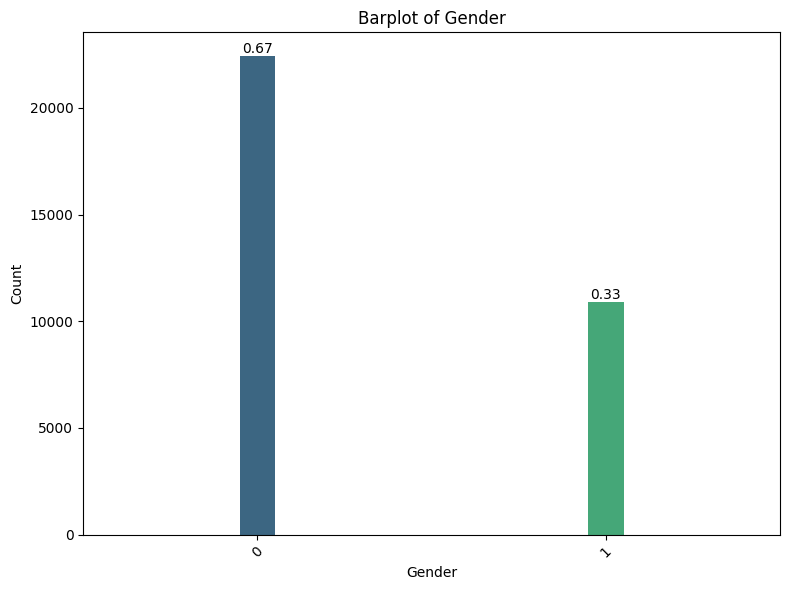

In [113]:
plot_cat(df, "Gender")

C:\Users\t-aelmiggabbar\AppData\Local\Temp\ipykernel_22884\2267914475.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], palette='viridis', width=w)


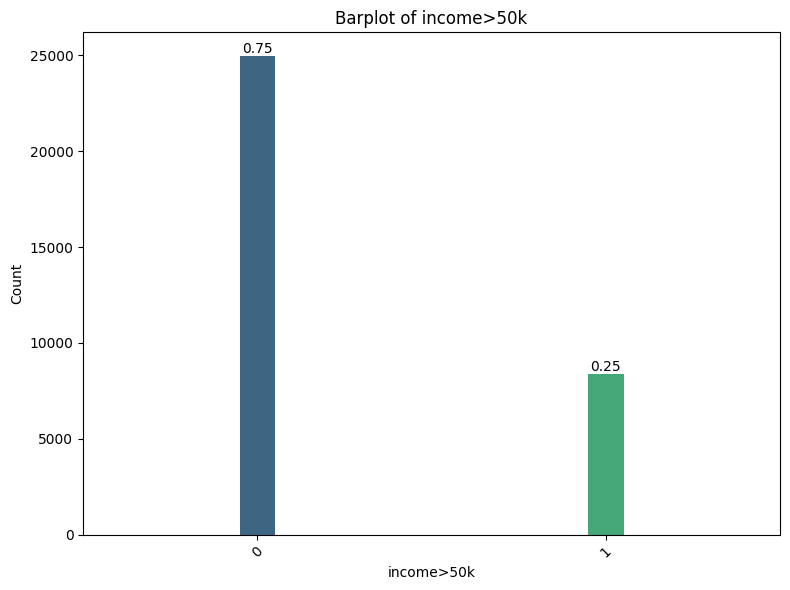

In [114]:
plot_cat(df, "income>50k")

C:\Users\t-aelmiggabbar\AppData\Local\Temp\ipykernel_22884\2267914475.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], palette='viridis', width=w)


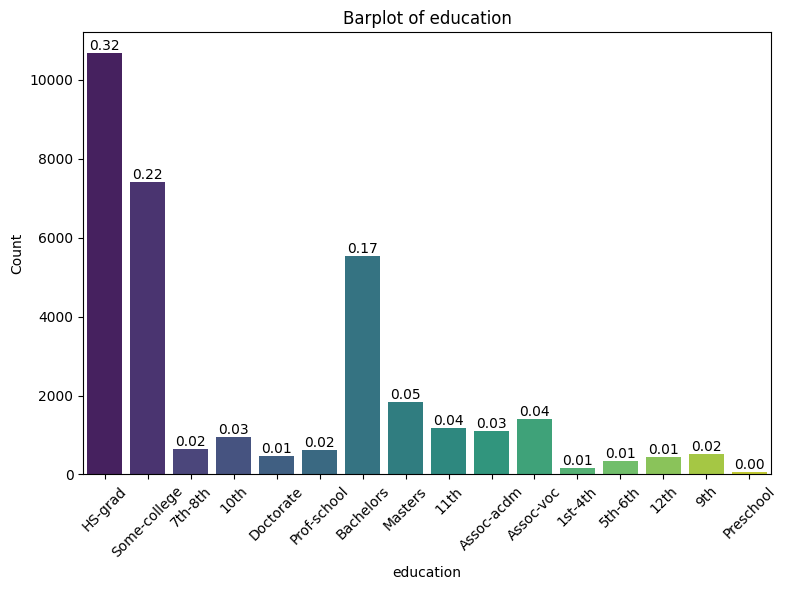

In [115]:
plot_cat(df, "education")

C:\Users\t-aelmiggabbar\AppData\Local\Temp\ipykernel_22884\2267914475.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], palette='viridis', width=w)


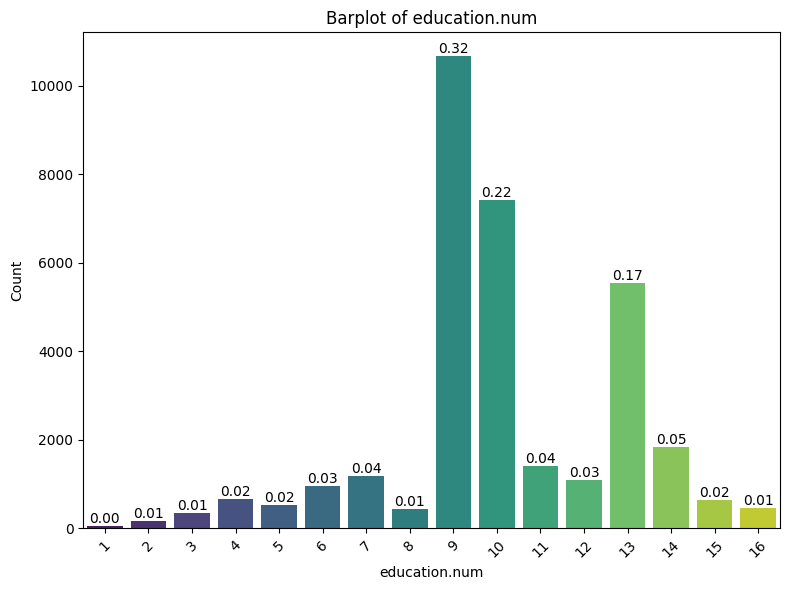

In [116]:
plot_cat(df, "education.num")

C:\Users\t-aelmiggabbar\AppData\Local\Temp\ipykernel_22884\2267914475.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], palette='viridis', width=w)


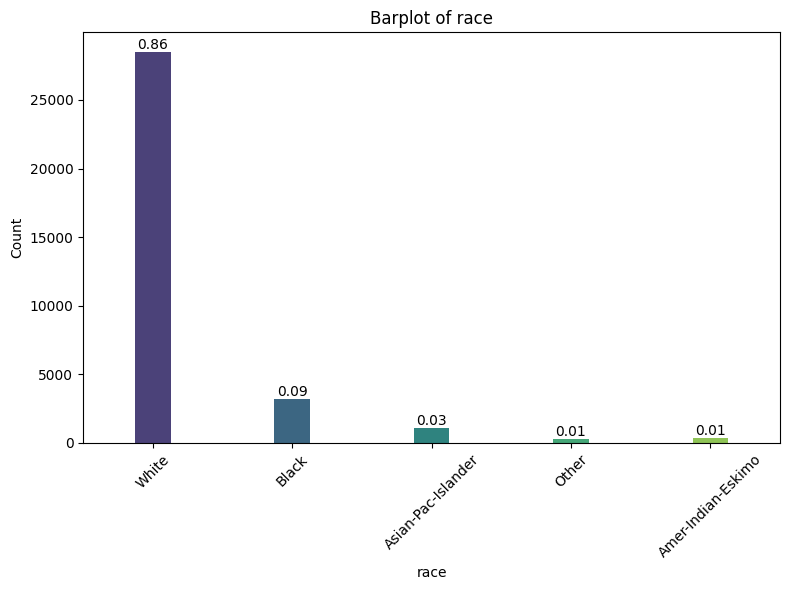

In [117]:
plot_cat(df, "race")

C:\Users\t-aelmiggabbar\AppData\Local\Temp\ipykernel_22884\2267914475.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], palette='viridis', width=w)


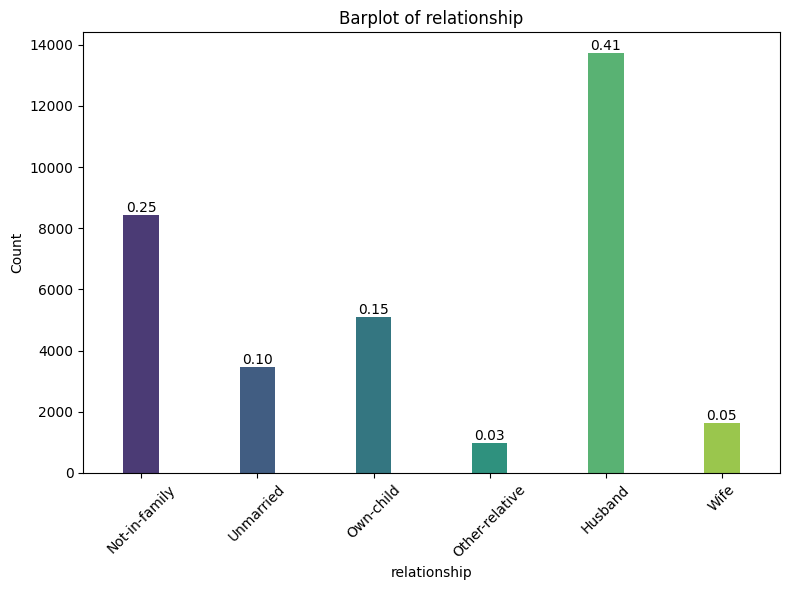

In [118]:
plot_cat(df, "relationship")

C:\Users\t-aelmiggabbar\AppData\Local\Temp\ipykernel_22884\2267914475.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], palette='viridis', width=w)


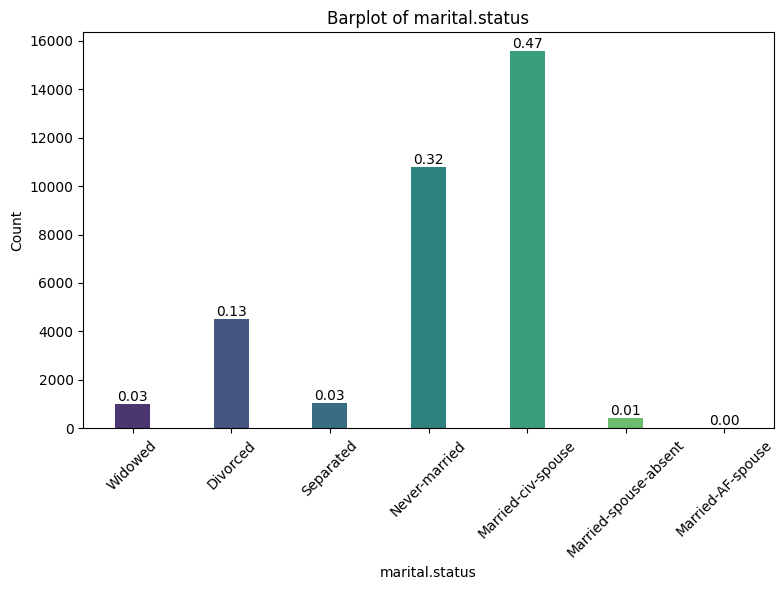

In [119]:
plot_cat(df, "marital.status")

C:\Users\t-aelmiggabbar\AppData\Local\Temp\ipykernel_22884\2267914475.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], palette='viridis', width=w)


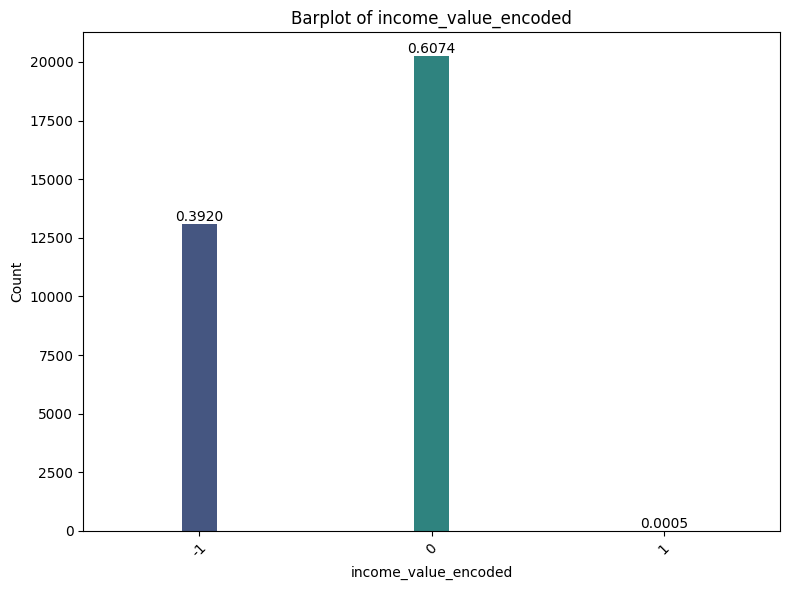

In [120]:
plot_cat(df, "income_value_encoded")